In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import random as rd
import matplotlib.pyplot as plt
import pdb # debugger
import matplotlib.dates as mdates
from scipy import stats
from scipy.special import loggamma

# <h1><center>Import Data</center></h1>

In [33]:
original_cases_data = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")

# Get columns needed
original_cases_data = original_cases_data.loc[:, ['submission_date', 'state', 'new_case', 'new_death']]

# Transform string date to datetime format
original_cases_data.loc[:, ['submission_date']] = pd.to_datetime(original_cases_data['submission_date'],
                                    infer_datetime_format=True)

# Get two states
original_cases_data_ME = original_cases_data.loc[(original_cases_data["state"] == "ME")].copy()
original_cases_data_KY = original_cases_data.loc[(original_cases_data["state"] == "KY")].copy()

# Sort by date
original_cases_data_ME.drop(columns=['state'], inplace=True)
original_cases_data_ME.sort_values(by='submission_date', inplace=True)
original_cases_data_ME.reset_index(drop=True, inplace=True)
original_cases_data_KY.drop(columns=['state'], inplace=True)
original_cases_data_KY.sort_values(by='submission_date', inplace=True)
original_cases_data_KY.reset_index(drop=True, inplace=True)

In [34]:
original_vaccinations_data = pd.read_csv("COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv")

# Get columns needed
original_vaccinations_data = original_vaccinations_data.loc[:, ['Date', 'Location', 'Administered']]

# Transform string date to datetime format
original_vaccinations_data.loc[:, ['Date']] = pd.to_datetime(original_vaccinations_data['Date'],
                                    infer_datetime_format=True)

# Get two states
original_vaccinations_data_ME = original_vaccinations_data.loc[(original_vaccinations_data["Location"] == "ME")].copy()
original_vaccinations_data_KY = original_vaccinations_data.loc[(original_vaccinations_data["Location"] == "KY")].copy()

# Sort by date
original_vaccinations_data_ME.drop(columns=['Location'], inplace=True)
original_vaccinations_data_ME.sort_values(by='Date', inplace=True)
original_vaccinations_data_ME.reset_index(drop=True, inplace=True)
original_vaccinations_data_KY.drop(columns=['Location'], inplace=True)
original_vaccinations_data_KY.sort_values(by='Date', inplace=True)
original_vaccinations_data_KY.reset_index(drop=True, inplace=True)

## <h1><center>Information</center></h1>

In [ ]:
original_cases_data_ME.info()
print()
original_cases_data_KY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  845 non-null    datetime64[ns]
 1   new_case         845 non-null    int64         
 2   new_death        845 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 19.9 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  845 non-null    datetime64[ns]
 1   new_case         845 non-null    int64         
 2   new_death        845 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 19.9 KB


In [ ]:
original_cases_data_ME.describe()

,new_case,new_death
count,845.000000,845.000000
mean,301.603550,2.764497
std,448.460598,5.903463
min,-2.000000,-1.000000
25%,26.000000,0.000000
50%,160.000000,1.000000
75%,398.000000,2.000000
max,3412.000000,53.000000


In [ ]:
original_cases_data_KY.describe()

,new_case,new_death
count,845.000000,845.000000
mean,1582.920710,18.717160
std,2375.601843,17.807734
min,0.000000,0.000000
25%,244.000000,5.000000
50%,712.000000,11.000000
75%,2056.000000,30.000000
max,18221.000000,79.000000


In [ ]:
original_vaccinations_data_ME.info()
print()
original_vaccinations_data_KY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          519 non-null    datetime64[ns]
 1   Administered  519 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.2 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          519 non-null    datetime64[ns]
 1   Administered  519 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.2 KB


In [ ]:
original_vaccinations_data_ME.describe()

,Administered
count,5.190000e+02
mean,1.665704e+06
std,9.033366e+05
min,0.000000e+00
25%,1.078156e+06
50%,1.735465e+06
75%,2.548532e+06
max,2.885836e+06


In [ ]:
original_vaccinations_data_KY.describe()

,Administered
count,5.190000e+02
mean,4.104724e+06
std,2.069377e+06
min,0.000000e+00
25%,2.956012e+06
50%,4.547219e+06
75%,5.971950e+06
max,6.574780e+06


# <h1><center>Mandatory Tasks</center></h1>

## Data Cleaning

* ### Clean Dataset

#### <h3><center>Cases Dataset</center></h3>

For cases dataset, there is no NA value. Dropna function will not have effect in this case.

In [ ]:
original_cases_data_ME = original_cases_data_ME.dropna()
original_cases_data_KY = original_cases_data_KY.dropna()

The min value of new case and new death should be great or equal to zero

In [ ]:
original_cases_data_ME['new_case'] = original_cases_data_ME['new_case'].clip(lower=0)
original_cases_data_KY['new_case'] = original_cases_data_KY['new_case'].clip(lower=0)

original_cases_data_ME['new_death'] = original_cases_data_ME['new_death'].clip(lower=0)
original_cases_data_KY['new_death'] = original_cases_data_KY['new_death'].clip(lower=0)

Cases statistics after drop missing value and clip

In [ ]:
original_cases_data_ME.describe()

,new_case,new_death
count,845.000000,845.000000
mean,301.605917,2.770414
std,448.458999,5.900183
min,0.000000,0.000000
25%,26.000000,0.000000
50%,160.000000,1.000000
75%,398.000000,2.000000
max,3412.000000,53.000000


In [ ]:
original_cases_data_KY.describe()

,new_case,new_death
count,845.000000,845.000000
mean,1582.920710,18.717160
std,2375.601843,17.807734
min,0.000000,0.000000
25%,244.000000,5.000000
50%,712.000000,11.000000
75%,2056.000000,30.000000
max,18221.000000,79.000000


#### <h3><center>Vaccinations Dataset</center></h3>

No NA values in vaccinations dataset. Dropna will have no effect.

In [35]:
original_vaccinations_data_ME = original_vaccinations_data_ME.dropna()
original_vaccinations_data_KY = original_vaccinations_data_KY.dropna()

In [36]:
# Convert to new administered per day
original_vaccinations_data_ME['Administered'] = original_vaccinations_data_ME['Administered'].diff()
original_vaccinations_data_ME['Administered'].iloc[0] = 0   # Ignore warning here
original_vaccinations_data_KY['Administered'] = original_vaccinations_data_KY['Administered'].diff()
original_vaccinations_data_KY['Administered'].iloc[0] = 0   # Ignore warning here

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


* ### Outlier Detection

In [38]:
def outlier_detection(original_data):
    cases_summary = original_data.describe()
    Q1 = cases_summary.iloc[4]
    Q3 = cases_summary.iloc[6]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    for i,col in enumerate(cases_summary.columns):
        lb = lower_bound[i]
        ub = upper_bound[i]
        original_data = original_data.loc[(original_data[col] >= lb) & (original_data[col] <= ub)]
    
    return original_data

In [39]:
cases_data_ME = outlier_detection(original_cases_data_ME)
cases_data_KY = outlier_detection(original_cases_data_KY)
print(('original number of samples of ME is {}, after removing the outliers the number of samples of ME is {}').format(len(original_cases_data_ME), len(cases_data_ME)))
print(('original number of samples of KY is {}, after removing the outliers the number of samples of KY is {}').format(len(original_cases_data_KY), len(cases_data_KY)))

original number of samples of ME is 836, after removing the outliers the number of samples of ME is 697
original number of samples of KY is 836, after removing the outliers the number of samples of KY is 772


After applying the Tukey's rule some outliers were being removed

In [40]:
vaccinations_data_ME = outlier_detection(original_vaccinations_data_ME)
vaccinations_data_KY = outlier_detection(original_vaccinations_data_KY)
print(('original number of samples of ME is {}, after removing the outliers the number of samples of ME is {}').format(len(original_vaccinations_data_ME), len(vaccinations_data_ME)))
print(('original number of samples of KY is {}, after removing the outliers the number of samples of KY is {}').format(len(original_vaccinations_data_KY), len(vaccinations_data_KY)))

original number of samples of ME is 510, after removing the outliers the number of samples of ME is 470
original number of samples of KY is 510, after removing the outliers the number of samples of KY is 475


There is no outliers in vaccination dataset

## Inferences

### a. Check whether the mean of COVID19 deaths and #cases are different for Feb’21 and March’21 in the two states.

In [ ]:
ME_data = original_cases_data_ME.copy()
ME_data = ME_data[ME_data["submission_date"].dt.year == 2021]
ME_data["submission_date"] = ME_data["submission_date"].dt.month

KY_data = original_cases_data_KY.copy()
KY_data = KY_data[KY_data["submission_date"].dt.year == 2021]
KY_data["submission_date"] = KY_data["submission_date"].dt.month

#### Helper Functions

In [ ]:
def mean(x):
    n = len(x)
    mean = np.sum(x) / n
    return mean

def sd(x):
    n = len(x)
    sd = np.sqrt(np.sum(np.square(x - mean(x)) / n))
    return sd

Use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. After calculation, MLE for the estimator is sample mean, and its standard error estimator is sample mean divided by sample size.

In [ ]:
def Wald_test(x, mu = 0):
    n = len(x)
    w = (mean(x) - mu) / np.sqrt(mean(x) / n)
    return w

def Z_test(x, mu = 0):
    n = len(x)
    z = (mean(x) - mu) / (sd(x) / np.sqrt(n))
    return z

def t_test(x, mu = 0):
    n = len(x)
    t = (mean(x) - mu) / (sd(x) / np.sqrt(n))
    return t

In [ ]:
def Wald_test_2(x, y, d = 0):
    n = len(x)
    m = len(y)
    w = ((mean(x) - mean(y)) - d) / np.sqrt((mean(x) / n) + (mean(y) / m))
    return w

def t_test_2(x, y, d = 0):
    n = len(x)
    m = len(y)
    t = ((mean(x) - mean(y)) - d) / np.sqrt((np.square(sd(x)) / n) + (np.square(sd(y)) / m))
    return t

#### Part 1: 
    First use one-sample tests for Wald’s, Z-test, and t-test by computing the sample mean of daily values from Feb’21 and using that as a guess for mean of daily values for March’21

<h4><center>Maine State</center></h4>

In [ ]:
Feb_ME_cases = ME_data[ME_data["submission_date"] == 2]["new_case"]
Feb_ME_deaths = ME_data[ME_data["submission_date"] == 2]["new_death"]

Mar_ME_cases = ME_data[ME_data["submission_date"] == 3]["new_case"]
Mar_ME_deaths = ME_data[ME_data["submission_date"] == 3]["new_death"]

In [ ]:
Feb_mean_cases = mean(Feb_ME_cases)
Feb_mean_deaths = mean(Feb_ME_deaths)

* ##### Wald test

In [ ]:
W_case = Wald_test(Mar_ME_cases, Feb_mean_cases)
p_case = 2 * stats.norm.sf(abs(W_case))

W_death = Wald_test(Mar_ME_deaths, Feb_mean_deaths)
p_death = 2 * stats.norm.sf(abs(W_death))

print("p-value for #cases is: ", p_case)
print("p-value for deaths is: ", p_death)

p-value for #cases is:  2.7367411481139397e-42
p-value for deaths is:  1.2996996017585634e-34


* ##### Z-test

In [ ]:
Z_case = Z_test(Mar_ME_cases, Feb_mean_cases)
p_case = 2 * stats.norm.sf(abs(Z_case))

Z_death = Z_test(Mar_ME_deaths, Feb_mean_deaths)
p_death = 2 * stats.norm.sf(abs(Z_death))

print("p-value for #cases is: ", p_case)
print("p-value for deaths is: ", p_death)

p-value for #cases is:  0.02278449748858519
p-value for deaths is:  7.77068417273477e-06


* ##### t-test

In [ ]:
df = len(Mar_ME_cases) - 1

t_case = t_test(Mar_ME_cases, Feb_mean_cases)
p_case = 2 * stats.t.sf(abs(t_case), df)

t_death = t_test(Mar_ME_deaths, Feb_mean_deaths)
p_death = 2 * stats.t.sf(abs(t_death), df)

print("p-value for #cases is: ", p_case)
print("p-value for deaths is: ", p_death)

p-value for #cases is:  0.03008236592589231
p-value for deaths is:  0.00010313145304921799


##### Conclusion:
The p-values from three one-sample tests are all smaller than 0.05, so we're able to reject the null hypethesis. Therefore, we can conclude that therea're significant difference in #cases and deaths between Feb'21 and Mar'21 in state ME.

<h4><center>Kentucky State</center></h4>

In [ ]:
Feb_KY_cases = KY_data[KY_data["submission_date"] == 2]["new_case"]
Feb_KY_deaths = KY_data[KY_data["submission_date"] == 2]["new_death"]

Mar_KY_cases = KY_data[KY_data["submission_date"] == 3]["new_case"]
Mar_KY_deaths = KY_data[KY_data["submission_date"] == 3]["new_death"]

In [ ]:
Feb_mean_cases = mean(Feb_KY_cases)
Feb_mean_deaths = mean(Feb_KY_deaths)

* ##### Wald test

In [ ]:
W_case = Wald_test(Mar_KY_cases, Feb_mean_cases)
p_case = 2 * stats.norm.sf(abs(W_case))

W_death = Wald_test(Mar_KY_deaths, Feb_mean_deaths)
p_death = 2 * stats.norm.sf(abs(W_death))

print("p-value for #cases is: ", p_case)
print("p-value for deaths is: ", p_death)

p-value for #cases is:  0.0
p-value for deaths is:  1.7126041810925073e-149


* ##### Z-test

In [ ]:
Z_case = Z_test(Mar_KY_cases, Feb_mean_cases)
p_case = 2 * stats.norm.sf(abs(Z_case))

Z_death = Z_test(Mar_KY_deaths, Feb_mean_deaths)
p_death = 2 * stats.norm.sf(abs(Z_death))

print("p-value for #cases is: ", p_case)
print("p-value for deaths is: ", p_death)

p-value for #cases is:  2.3241918476171816e-92
p-value for deaths is:  2.2869615940908e-92


* ##### t-test

In [ ]:
df = len(Mar_KY_cases) - 1

t_case = t_test(Mar_KY_cases, Feb_mean_cases)
p_case = 2 * stats.t.sf(abs(t_case), df)

t_death = t_test(Mar_KY_deaths, Feb_mean_deaths)
p_death = 2 * stats.t.sf(abs(t_death), df)

print("p-value for #cases is: ", p_case)
print("p-value for deaths is: ", p_death)

p-value for #cases is:  3.9626245802498845e-19
p-value for deaths is:  3.958318685750323e-19


##### Conclusion:
The p-values from three one-sample tests are all smaller than 0.05, so we're able to reject the null hypethesis. Therefore, we can conclude that there is significant difference in #cases and deaths between Feb'21 and Mar'21 in state KY.

#### Part 2:
    Repeat with the two-sample version of Wald’s and two-sample unpaired t-test 

<h4><center>Maine State</center></h4>

* ##### Wald's test

In [ ]:
W_case = Wald_test_2(Feb_ME_cases, Mar_ME_cases)
p_case = 2 * stats.norm.sf(abs(W_case))

W_death = Wald_test_2(Feb_ME_deaths, Mar_ME_deaths)
p_death = 2 * stats.norm.sf(abs(W_death))

print("p-value for #cases is: ", p_case)
print("p-value for deaths is: ", p_death)

p-value for #cases is:  8.150897407215005e-23
p-value for deaths is:  2.415376728041971e-09


* ##### t-test

In [ ]:
df = len(Feb_ME_cases) + len(Mar_ME_cases) - 2

t_case = t_test_2(Feb_ME_cases, Mar_ME_cases)
p_case = 2 * stats.t.sf(abs(t_case), df)

t_death = t_test_2(Feb_ME_deaths, Mar_ME_deaths)
p_death = 2 * stats.t.sf(abs(t_death), df)

print("p-value for #cases is: ", p_case)
print("p-value for deaths is: ", p_death)

p-value for #cases is:  0.0554286170650609
p-value for deaths is:  0.06287889888015301


##### Conclusion:
In Wald's test, p-values for both #cases and deaths are very small (both are smaller than 0.05), so we're able to reject the null hypothesis for them. However, in t-test, p-values for them are larger than we obtained in Wald's test. Both of them are greater than 0.05, so we cannot reject the null hypothesis. Therefore, we can conclude that therea're significant difference in #cases and deaths between Feb'21 and Mar'21 in state ME.

<h4><center>Kentucky State</center></h4>

* ##### Wald's test

In [ ]:
W_case = Wald_test_2(Feb_KY_cases, Mar_KY_cases)
p_case = 2 * stats.norm.sf(abs(W_case))

W_death = Wald_test_2(Feb_KY_deaths, Mar_KY_deaths)
p_death = 2 * stats.norm.sf(abs(W_death))

print("p-value for #cases is: ", p_case)
print("p-value for deaths is: ", p_death)

p-value for #cases is:  0.0
p-value for deaths is:  1.2307580015011096e-42


* ##### t-test

In [ ]:
df = len(Feb_KY_cases) + len(Mar_KY_cases) - 2

t_case = t_test_2(Feb_KY_cases, Mar_KY_cases)
p_case = 2 * stats.t.sf(abs(t_case), df)

t_death = t_test_2(Feb_KY_deaths, Mar_KY_deaths)
p_death = 2 * stats.t.sf(abs(t_death), df)

print("p-value for #cases is: ", p_case)
print("p-value for deaths is: ", p_death)

p-value for #cases is:  5.683681248038381e-10
p-value for deaths is:  2.085950070933702e-14


##### Conclusion:
In Wald's test, p-values for both #cases and deaths are very small (both are smaller than 0.05), so we're able to reject the null hypothesis for them. However, in t-test, p-values for them are larger than we obtained in Wald's test, but the results remain the same. For both of them, p-values are smaller than 0.05, so we can also reject the null hypothesis. Therefore, we can conclude that there is significant difference in #cases and deaths between Feb'21 and Mar'21 in state KY.

### b. Inference the equality of distributions between the two states (distribution of daily #cases and daily #deaths) for the last three months of 2021 (Oct, Nov, Dec) of your dataset using K-S test and Permutation test.

In [ ]:
ME_data = original_cases_data_ME.copy()
ME_data = ME_data[ME_data["submission_date"].dt.year == 2021]
ME_data["submission_date"] = ME_data["submission_date"].dt.month

KY_data = original_cases_data_KY.copy()
KY_data = KY_data[KY_data["submission_date"].dt.year == 2021]
KY_data["submission_date"] = KY_data["submission_date"].dt.month

In [ ]:
ME_cases = ME_data[(ME_data["submission_date"] == 10) | (ME_data["submission_date"] == 11) | (ME_data["submission_date"] == 12)]["new_case"]
ME_deaths = ME_data[(ME_data["submission_date"] == 10) | (ME_data["submission_date"] == 11) | (ME_data["submission_date"] == 12)]["new_death"]

KY_cases = KY_data[(KY_data["submission_date"] == 10) | (KY_data["submission_date"] == 11) | (KY_data["submission_date"] == 12)]["new_case"]
KY_deaths = KY_data[(KY_data["submission_date"] == 10) | (KY_data["submission_date"] == 11) | (KY_data["submission_date"] == 12)]["new_death"]

#### Helper Functions

In [ ]:
def dpois(x, l):
    log_p = np.log(l) * x - loggamma(x+1) - l
    p = np.exp(log_p)
    return p

def ppois(x, l):
    p = 0
    for i in range(0, x+1):
        p += dpois(i, l)
    return p

In [ ]:
def dgeom(x, prob):
    p = np.power(1-prob, x) * prob
    return p

def pgeom(x, prob):
    p = 0
    for i in range(0, x+1):
        p += dgeom(i, prob)
    return p

In [ ]:
def dbinom(x, n, prob):
    log_p = loggamma(n+1) - loggamma(x+1) - loggamma(n-x+1) + x * np.log(prob) + (n-x) * np.log(1-prob)
    p = np.exp(log_p)
    return p

def pbinom(x, n, prob):
    p = 0
    for i in range(0, x+1):
        p += dbinom(i, n, prob)
    return p

In [ ]:
def empirical_cdf(x):
    n = len(x)
    x_sort = pd.Series.sort_values(x)
    x = pd.Series.drop_duplicates(x_sort)
    p = []
    for i in x:
        prob = sum(x_sort <= i) / n
        p.append(prob)
    return p

In [ ]:
def empirical_cdf_1(x, y):
    n = len(x)
    x_sort = pd.Series.sort_values(x)
    y_sort = pd.Series.sort_values(y)
    y = pd.Series.drop_duplicates(y_sort)
    p = []
    for i in y:
        prob = sum(x_sort <= i) / n
        p.append(prob)
    return p

In [ ]:
def K_S_test(x, f, p1 = None, p2 = None):
    x = pd.Series.drop_duplicates(x)
    x = pd.Series.sort_values(x)
    
    ecdf = empirical_cdf(x)
    cdf = []
    if p2 == None:
        for i in x:
            cdf.append(f(i, p1))
    else:
        for i in x:
            cdf.append(f(i, p1, p2))
    
    ecdf_pos = ecdf
    ecdf.pop()
    ecdf.insert(0, 0)
    ecdf_neg = ecdf
    
    d1 = list(map(abs, np.subtract(cdf, ecdf_neg)))
    d2 = list(map(abs, np.subtract(cdf, ecdf_pos)))
    d1.extend(d2)
    d = max(d1)
    
    return d

In [ ]:
def K_S_test_2(x, y):
    x_sort = pd.Series.sort_values(x)
    x = pd.Series.drop_duplicates(x_sort)
    
    ecdf_x = empirical_cdf(x)
    ecdf_pos_x = ecdf_x
    ecdf_x.pop()
    ecdf_x.insert(0, 0)
    ecdf_neg_x = ecdf_x
    
    ecdf_y = empirical_cdf_1(y, x)
    ecdf_pos_y = ecdf_y
    ecdf_y.pop()
    ecdf_y.insert(0, 0)
    ecdf_neg_y = ecdf_y
    
    
    d1 = list(map(abs, np.subtract(ecdf_neg_x, ecdf_neg_y)))
    d2 = list(map(abs, np.subtract(ecdf_pos_x, ecdf_pos_y)))
    d1.extend(d2)
    d = max(d1)
    
    return d

In [ ]:
def permutation_test(x, y, n = 100):
    k = len(x)
    
    x = list(x)
    y = list(y)
    T_obs = abs(mean(x) - mean(y))
    
    z = x + y
    T = []
    for i in range(0, n):
        rd.shuffle(z)
        s = z[:k]
        t = z[k:]
        T.append(abs(mean(s) - mean(t))) 
    p = sum(T > T_obs) / n
    
    return p

#### Part 1
    1-sample test, try Poisson, Geometric, and Binomial.

<h4><center>Maine State</center></h4>

* ##### Poisson

In [ ]:
l_cases = mean(KY_cases)
l_deaths = mean(KY_deaths)

d_cases = K_S_test(ME_cases, ppois, l_cases)
d_deaths = K_S_test(ME_deaths, ppois, l_deaths)

print("The K-S test statistics for #cases is: ", d_cases)
print("The K-S test statistics for deaths is: ", d_deaths)

The K-S test statistics for #cases is:  0.9891304347826086
The K-S test statistics for deaths is:  0.6222816414424707


* ##### Geometric

In [ ]:
p_cases = 1 / (1 + mean(KY_cases))
p_deaths = 1 / (1 + mean(KY_deaths))

d_cases = K_S_test(ME_cases, pgeom, p_cases)
d_deaths = K_S_test(ME_deaths, pgeom, p_deaths)

print("The K-S test statistics for #cases is: ", d_cases)
print("The K-S test statistics for deaths is: ", d_deaths)

The K-S test statistics for #cases is:  0.49352761072665247
The K-S test statistics for deaths is:  0.28319427662454166


* ##### Binomial

In [ ]:
n_cases = np.square(mean(KY_cases)) / (mean(KY_cases) - np.square(sd(KY_cases)))
p_cases = mean(KY_cases) / n_cases
print("The values of MME is: ", n_cases, p_cases)

The values of MME is:  -2.3164326322989957 -830.5358886579016


<h4><center>Kentucky State</center></h4>

* ##### Poisson

In [ ]:
l_cases = mean(ME_cases)
l_deaths = mean(ME_deaths)

d_cases = K_S_test(KY_cases, ppois, l_cases)
d_deaths = K_S_test(KY_deaths, ppois, l_deaths)

print("The K-S test statistics for #cases is: ", d_cases)
print("The K-S test statistics for deaths is: ", d_deaths)

The K-S test statistics for #cases is:  0.9205299896393511
The K-S test statistics for deaths is:  0.9362244016772192


* ##### Geometric

In [ ]:
p_cases = 1 / (1 + mean(ME_cases))
p_deaths = 1 / (1 + mean(ME_deaths))

d_cases = K_S_test(KY_cases, pgeom, p_cases)
d_deaths = K_S_test(KY_deaths, pgeom, p_deaths)

print("The K-S test statistics for #cases is: ", d_cases)
print("The K-S test statistics for deaths is: ", d_deaths)

The K-S test statistics for #cases is:  0.6100887263327393
The K-S test statistics for deaths is:  0.8121693700070038


* ##### Binomial

In [ ]:
n_cases = np.square(mean(ME_cases)) / (mean(ME_cases) - np.square(sd(ME_cases)))
p_cases = mean(ME_cases) / n_cases
print("The values of MME is: ", n_cases, p_cases)

The values of MME is:  -4.490745239131433 -150.85856694809493


##### Conclusion:
The threshold is 0.05 for K-S test. All K-S test statistics we obtained are greater than 0.05, so we're able to reject the null hypothesis. Therefore, the distributions of #cases and deaths between two states are different. For binomial distribution, the MME we obtained is negative, it implies that the data doesn't follow the binomial distribution.

#### Part 2
    2-sample test

In [ ]:
d_cases = K_S_test_2(ME_cases, KY_cases)
d_deaths = K_S_test_2(ME_deaths, KY_deaths)

print("The 2-sample K-S test statistics for #cases is: ", d_cases)
print("The 2-sample K-S test statistics for deaths is: ", d_deaths)

The 2-sample K-S test statistics for #cases is:  0.6739130434782608
The 2-sample K-S test statistics for deaths is:  0.5108695652173914


##### Conclusion:
The threshold is 0.05 for K-S test. All K-S test statistics we obtained are greater than 0.05, so we're able to reject the null hypothesis. Therefore, the distributions of #cases and deaths between two states are different.

#### Part 3
    permutation test

In [ ]:
p_cases = permutation_test(ME_cases, KY_cases, n = 1000)
p_deaths = permutation_test(ME_deaths, KY_deaths, n = 1000)

print("The p-value of the permutation for #cases is: ", p_cases)
print("The p-value of the permutation for deaths is: ", p_deaths)

The p-value of the permutation for #cases is:  0.0
The p-value of the permutation for deaths is:  0.0


##### Conclusion:
The threshold is 0.05 for permutation test. The p-values we obtained are smaller than 0.05 (actually 0), so we're able to reject the null hypothesis. Therefore, the distributions of #cases and deaths between two states are different.

### c. Bayesian inference on daily stats

#### Helper Functions

In [73]:
def my_sample_mean(array):
    # Mean
    return sum(array) / len(array)

def my_exponential_pdf(array, para_lambda):
    # PDF for exponential distribution
    array = np.array(array)
    log_likelihood = np.log(para_lambda) - para_lambda * array
    return np.exp(log_likelihood)

def my_poisson_pmf(array, para_lambda):
    # PMF for poisson distribution
    array = np.array(array)
    log_likelihood = np.log(para_lambda) * array - loggamma(array + 1) - para_lambda
    return np.exp(log_likelihood)

def caclulate_posterior_from_data(start_date, end_date):
    data = case_data_combined.loc[(case_data_combined['submission_date'] >= start_date) & 
                        (case_data_combined['submission_date'] < end_date)]

    # Calculate posterior
    posterior_cases = My_Posterior()
    posterior_cases.get_posterior(data['new_case'], beta_cases)

    posterior_death = My_Posterior()
    posterior_death.get_posterior(data['new_death'], beta_death)

    return posterior_cases, posterior_death

class My_Posterior:
    def __init__(self):
        self.prior = my_exponential_pdf
        self.dist = my_poisson_pmf
        self.data = None
        self.beta = None

    def get_posterior(self, data, beta):
        self.data = data
        self.beta = beta
    
    def posterior_pdf(self, lambda_points):
        posterior_list = []
        for lamb in lambda_points:
            prior = self.prior(lamb, 1/self.beta)
            log_likelihood = np.sum(np.log(self.dist(self.data, lamb)))
            posterior = np.log(prior) + log_likelihood
            posterior_list.append(posterior)
        return posterior_list

#### Sum up data from two states

In [74]:
# Sum up the cases data
case_data_combined = cases_data_ME.merge(cases_data_KY, on='submission_date', how='outer', sort=True).fillna(0)
case_data_combined.loc[:, ['new_case']] = case_data_combined['new_case_x'] + case_data_combined['new_case_y']
case_data_combined.loc[:, ['new_death']] = case_data_combined['new_death_x'] + case_data_combined['new_death_y']

# Discard extra columns
case_data_combined.drop(columns=['new_case_x', 'new_case_y', 'new_death_x', 'new_death_y'], inplace=True)

In [75]:
# Discard data before June 1st 2020 which is the day 1 we assume
start_date = pd.to_datetime('2020-06-01')
case_data_combined = case_data_combined.loc[case_data_combined['submission_date'] >= start_date].reset_index()

#### Calculate MME

In [76]:
# Get first 28 days to calculate MME
end_date = start_date + pd.DateOffset(weeks=4)
first_28_days = case_data_combined.loc[(case_data_combined['submission_date'] >= start_date) & 
                        (case_data_combined['submission_date'] < end_date)]

# Calculate MME
beta_cases = my_sample_mean(first_28_days['new_case'])
beta_death = my_sample_mean(first_28_days['new_death'])

#### Calculate Posterior

In [77]:
# Obtain data from fifth week
fifth_week_start_date = end_date
fifth_week_end_date = fifth_week_start_date + pd.DateOffset(weeks=1)

fifth_week_cases_posterior, fifth_week_death_posterior = caclulate_posterior_from_data(fifth_week_start_date, fifth_week_end_date)

# Obtain data from fifth week to sixth week
sixth_week_end_date = fifth_week_start_date + pd.DateOffset(weeks=2)

sixth_week_cases_posterior, sixth_week_death_posterior = caclulate_posterior_from_data(fifth_week_start_date, sixth_week_end_date)

# Obtain data from fifth week to seventh week
seventh_week_end_date = fifth_week_start_date + pd.DateOffset(weeks=3)

seventh_week_cases_posterior, seventh_week_death_posterior = caclulate_posterior_from_data(fifth_week_start_date, seventh_week_end_date)

# Obtain data from fifth week to eighth week
eighth_week_end_date = fifth_week_start_date + pd.DateOffset(weeks=4)

eighth_week_cases_posterior, eighth_week_death_posterior = caclulate_posterior_from_data(fifth_week_start_date, eighth_week_end_date)

#### Result

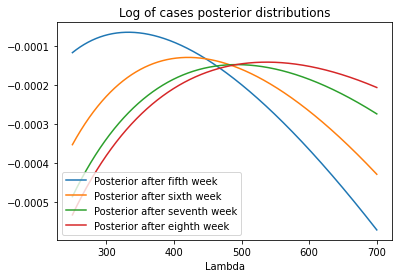

In [78]:
step = 0.1
lower = 250
upper = 700
x_points = np.arange(lower, upper + step, step)

fifth_pdf = fifth_week_cases_posterior.posterior_pdf(x_points)
sixth_pdf = sixth_week_cases_posterior.posterior_pdf(x_points)
seventh_pdf = seventh_week_cases_posterior.posterior_pdf(x_points)
eighth_pdf = eighth_week_cases_posterior.posterior_pdf(x_points)

plt.title('Log of cases posterior distributions')
plt.xlabel('Lambda')
plt.plot(x_points, fifth_pdf/abs(sum(fifth_pdf)), label='Posterior after fifth week')
plt.plot(x_points, sixth_pdf/abs(sum(sixth_pdf)), label='Posterior after sixth week')
plt.plot(x_points, seventh_pdf/abs(sum(seventh_pdf)), label='Posterior after seventh week')
plt.plot(x_points, eighth_pdf/abs(sum(eighth_pdf)), label='Posterior after eighth week')
plt.legend(loc='lower left')
plt.show()

In [79]:
print(f'MAP of fifth week posterior: {x_points[np.argmax(fifth_pdf)]:.2f}')
print(f'MAP of sixth week posterior: {x_points[np.argmax(sixth_pdf)]:.2f}')
print(f'MAP of seventh week posterior: {x_points[np.argmax(seventh_pdf)]:.2f}')
print(f'MAP of eighth week posterior: {x_points[np.argmax(eighth_pdf)]:.2f}')

MAP of fifth week posterior: 332.70
MAP of sixth week posterior: 421.10
MAP of seventh week posterior: 492.90
MAP of eighth week posterior: 537.30


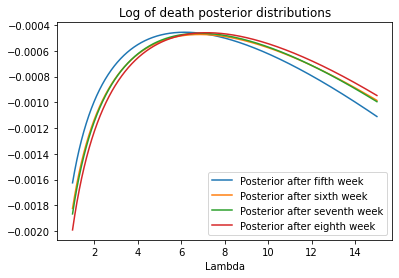

In [80]:
step = 0.01
lower = 1
upper = 15
x_points = np.arange(lower, upper + step, step)

fifth_pdf = fifth_week_death_posterior.posterior_pdf(x_points)
sixth_pdf = sixth_week_death_posterior.posterior_pdf(x_points)
seventh_pdf = seventh_week_death_posterior.posterior_pdf(x_points)
eighth_pdf = eighth_week_death_posterior.posterior_pdf(x_points)

plt.title('Log of death posterior distributions')
plt.xlabel('Lambda')
plt.plot(x_points, fifth_pdf/abs(sum(fifth_pdf)), label='Posterior after fifth week')
plt.plot(x_points, sixth_pdf/abs(sum(sixth_pdf)), label='Posterior after sixth week')
plt.plot(x_points, seventh_pdf/abs(sum(seventh_pdf)), label='Posterior after seventh week')
plt.plot(x_points, eighth_pdf/abs(sum(eighth_pdf)), label='Posterior after eighth week')
plt.legend(loc='lower right')
plt.show()

In [81]:
print(f'MAP of fifth week posterior: {x_points[np.argmax(fifth_pdf)]:.2f}')
print(f'MAP of sixth week posterior: {x_points[np.argmax(sixth_pdf)]:.2f}')
print(f'MAP of seventh week posterior: {x_points[np.argmax(seventh_pdf)]:.2f}')
print(f'MAP of eighth week posterior: {x_points[np.argmax(eighth_pdf)]:.2f}')

MAP of fifth week posterior: 6.15
MAP of sixth week posterior: 6.85
MAP of seventh week posterior: 6.85
MAP of eighth week posterior: 7.17


### d. Predict #vaccines administered for the fourth week in May 2021 using data from the first three weeks of May 2021.

#### Helper Functions

In [63]:
def generate_dataset(data, ar_num):
    # Generate dataset for AR
    if ar_num > len(data):
        raise ValueError('ar_num cannnot be greater than the length of data')

    data = np.array(data)
    X = []
    y = []
    for i in reversed(range(ar_num, len(data))):
        # Get X index
        ind = np.full(ar_num, i)
        ind = ind - range(0, ar_num) - 1
        X.append(data[ind])

        y.append(data[i])
    
    return np.array(X), np.array(y)

def my_MLR(X, y):
    X = np.concatenate((X, np.ones((len(X), 1))), axis=1)
    return np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))

def AR(data, labels, ar_num):
    end_date = data.iloc[0]['Date'] + pd.DateOffset(weeks=3)
    pred_list = []
    for i in range(len(labels)):
        train_data = data.loc[(data['Date'] < end_date)]

        # Generate dataset
        X, y = generate_dataset(train_data['Administered'], ar_num)
        beta = my_MLR(X, y)

        # Get data for prediction
        pred_data = train_data.iloc[-ar_num:]['Administered']
        pred_data = np.append(pred_data, 1)

        pred = sum(beta * pred_data)

        pred_list.append(pred)

        end_date = end_date + pd.DateOffset(days=1)
    
    return pred_list

def my_MAPE(pred, labels):
    pred = np.array(pred)
    labels = np.array(labels)
    return (sum(abs((labels - pred) / labels)) * 100) / len(labels)

def my_MSE(pred, labels):
    pred = np.array(pred)
    labels = np.array(labels)
    return sum((labels - pred) ** 2) / len(labels)

def EWMA(data, labels, alpha):
    # Get trainning dataset
    train_data = np.array(data['Administered'])
    # Set starting condition
    pred = train_data[0]
    pred_list = []
    for i in range(2, len(train_data)):
        pred = alpha * train_data[i-1] + (1 - alpha) * pred
        pred_list.append(pred)
    # Only need the fourth week prediction
    return pred_list[-len(labels):]

#### Get Data

In [64]:
# Get first four weeks for dataset
start_date = pd.to_datetime('2021-05-01')
end_date = start_date + pd.DateOffset(weeks=4)
first_four_weeks_ME = vaccinations_data_ME.loc[(vaccinations_data_ME['Date'] >= start_date) &
                            (vaccinations_data_ME['Date'] < end_date)]
first_four_weeks_KY = vaccinations_data_KY.loc[(vaccinations_data_KY['Date'] >= start_date) &
                            (vaccinations_data_KY['Date'] < end_date)]

# Get fourth week for ground truth
start_date = start_date + pd.DateOffset(weeks=3)
ground_truth_ME = vaccinations_data_ME.loc[(vaccinations_data_ME['Date'] >= start_date) &
                            (vaccinations_data_ME['Date'] < end_date)]['Administered']
ground_truth_KY = vaccinations_data_KY.loc[(vaccinations_data_KY['Date'] >= start_date) &
                            (vaccinations_data_KY['Date'] < end_date)]['Administered']

#### AR(3)

In [65]:
pred_list_ME = AR(first_four_weeks_ME, ground_truth_ME, 3)
pred_list_KY = AR(first_four_weeks_KY, ground_truth_KY, 3)

In [66]:
print(f'MAPE for Maine prediction: {my_MAPE(pred_list_ME, ground_truth_ME):.2f}%')
print(f'MAPE for Kentucky prediction: {my_MAPE(pred_list_KY, ground_truth_KY):.2f}%')
print(f'MSE for Maine prediction: {my_MSE(pred_list_ME, ground_truth_ME):.2f}')
print(f'MSE for Maine prediction: {my_MSE(pred_list_KY, ground_truth_KY):.2f}')

MAPE for Maine prediction: 289.67%
MAPE for Kentucky prediction: 65.84%
MSE for Maine prediction: 66057162.20
MSE for Maine prediction: 87481232.80


#### AR(5)

In [67]:
pred_list_ME = AR(first_four_weeks_ME, ground_truth_ME, 5)
pred_list_KY = AR(first_four_weeks_KY, ground_truth_KY, 5)

In [68]:
print(f'MAPE for Maine prediction: {my_MAPE(pred_list_ME, ground_truth_ME):.2f}%')
print(f'MAPE for Kentucky prediction: {my_MAPE(pred_list_KY, ground_truth_KY):.2f}%')
print(f'MSE for Maine prediction: {my_MSE(pred_list_ME, ground_truth_ME):.2f}')
print(f'MSE for Maine prediction: {my_MSE(pred_list_KY, ground_truth_KY):.2f}')

MAPE for Maine prediction: 61.33%
MAPE for Kentucky prediction: 60.87%
MSE for Maine prediction: 5410097.04
MSE for Maine prediction: 68522710.74


#### EWMA with alpha = 0.5

In [69]:
pred_list_ME = EWMA(first_four_weeks_ME, ground_truth_ME, 0.5)
pred_list_KY = EWMA(first_four_weeks_KY, ground_truth_KY, 0.5)

In [70]:
print(f'MAPE for Maine prediction: {my_MAPE(pred_list_ME, ground_truth_ME):.2f}%')
print(f'MAPE for Kentucky prediction: {my_MAPE(pred_list_KY, ground_truth_KY):.2f}%')
print(f'MSE for Maine prediction: {my_MSE(pred_list_ME, ground_truth_ME):.2f}')
print(f'MSE for Maine prediction: {my_MSE(pred_list_KY, ground_truth_KY):.2f}')

MAPE for Maine prediction: 267.95%
MAPE for Kentucky prediction: 58.94%
MSE for Maine prediction: 33018646.79
MSE for Maine prediction: 58781695.62


#### EWMA with alpha = 0.8

In [71]:
pred_list_ME = EWMA(first_four_weeks_ME, ground_truth_ME, 0.8)
pred_list_KY = EWMA(first_four_weeks_KY, ground_truth_KY, 0.8)

In [72]:
print(f'MAPE for Maine prediction: {my_MAPE(pred_list_ME, ground_truth_ME):.2f}%')
print(f'MAPE for Kentucky prediction: {my_MAPE(pred_list_KY, ground_truth_KY):.2f}%')
print(f'MSE for Maine prediction: {my_MSE(pred_list_ME, ground_truth_ME):.2f}')
print(f'MSE for Maine prediction: {my_MSE(pred_list_KY, ground_truth_KY):.2f}')

MAPE for Maine prediction: 220.44%
MAPE for Kentucky prediction: 55.18%
MSE for Maine prediction: 34148660.11
MSE for Maine prediction: 58942450.69


### e. Use the paired T-test to determine the equality of means of the #vaccines administered between the two states for the months of September 2021 and November 2021.

In [ ]:
ME_data = original_vaccinations_data_ME.copy()
ME_data = ME_data[ME_data["Date"].dt.year == 2021]
ME_data["Date"] = ME_data["Date"].dt.month

KY_data = original_vaccinations_data_KY.copy()
KY_data = KY_data[KY_data["Date"].dt.year == 2021]
KY_data["Date"] = KY_data["Date"].dt.month

In [ ]:
ME_administered = ME_data[(ME_data["Date"] == 9) | (ME_data["Date"] == 11)]["Administered"]
KY_administered = KY_data[(KY_data["Date"] == 9) | (KY_data["Date"] == 11)]["Administered"]

In [ ]:
difference = pd.Series.subtract(ME_administered, KY_administered, fill_value = 0)

In [ ]:
df = len(difference) - 1

t = t_test(difference)
p = 2 * stats.t.sf(abs(t), df)

print("The p-value for the #vaccines administered between the two states is: ", p)

The p-value for the #vaccines administered between the two states is:  4.932096878911056e-91


##### Conclusion:
Since the p-value is very close to 0, it's smaller than 0.05. So, we're able to reject the null hypothesis, and we can conclude that there is a significant difference between #vaccines administered in two states.

# <h1><center>Exploratory Tasks</center></h1>

The Data we used in this part is about the price of bitcoin, we think there is an association between the bitcoin's price and the pandamic. Hence, We propose three new inferences about this dataset.

## Part 1

In [ ]:
btc_data = pd.read_csv('BTC 2012-2021.csv')
btc_data.loc[:, ['Date']] = pd.to_datetime(btc_data['Date'], infer_datetime_format=True)
btc_data.sort_values(by='Date', inplace=True)
btc_data.reset_index(drop=True, inplace=True)
btc_data

,Date,Price,Open,High,Low,Vol.,Change %
0,2012-01-01,5.3,4.7,5.5,4.6,108.51K,11.65
1,2012-01-02,5.2,5.3,5.5,4.8,69.15K,-0.95
2,2012-01-03,4.9,5.2,5.3,4.7,125.17K,-6.51
3,2012-01-04,5.6,4.9,5.7,4.8,131.17K,14.14
4,2012-01-05,6.9,5.6,7.2,5.6,182.33K,24.78
...,...,...,...,...,...,...,...
3648,2021-12-27,50678.2,50783.6,52016.3,50459.0,43.90K,-0.20
3649,2021-12-28,47545.2,50703.4,50703.8,47345.7,74.39K,-6.18
3650,2021-12-29,46461.7,47548.4,48121.7,46127.8,63.92K,-2.28
3651,2021-12-30,47123.3,46470.7,47901.4,46003.0,60.96K,1.42


In [ ]:
original_cases_data
original_cases_data.sort_values(by='submission_date', inplace=True)
original_cases_data.reset_index(drop=True, inplace=True)

In [ ]:
us_cases_data = original_cases_data.groupby(by=['submission_date'], dropna=False).sum().reset_index()
us_cases_data.rename(columns={'submission_date': 'Date'}, inplace=True)
us_cases_data

,Date,new_case,new_death
0,2020-01-22,0,0
1,2020-01-23,1,0
2,2020-01-24,1,0
3,2020-01-25,0,0
4,2020-01-26,1,0
...,...,...,...
840,2022-05-11,146815,555
841,2022-05-12,100435,254
842,2022-05-13,114868,424
843,2022-05-14,19502,31


In [ ]:
btc_case_data = us_cases_data.merge(btc_data, how='inner', on='Date')
btc_case_data

,Date,new_case,new_death,Price,Open,High,Low,Vol.,Change %
0,2020-01-22,0,0,8678.5,8733.0,8805.4,8610.8,509.06K,-0.62
1,2020-01-23,1,0,8405.1,8678.5,8687.3,8309.6,722.67K,-3.15
2,2020-01-24,1,0,8439.9,8404.9,8522.0,8242.6,617.02K,0.41
3,2020-01-25,0,0,8341.6,8439.9,8447.6,8277.2,444.00K,-1.17
4,2020-01-26,1,0,8607.8,8341.6,8607.8,8304.9,468.34K,3.19
...,...,...,...,...,...,...,...,...,...
705,2021-12-27,466385,1626,50678.2,50783.6,52016.3,50459.0,43.90K,-0.20
706,2021-12-28,401625,2185,47545.2,50703.4,50703.8,47345.7,74.39K,-6.18
707,2021-12-29,488843,1578,46461.7,47548.4,48121.7,46127.8,63.92K,-2.28
708,2021-12-30,602744,1339,47123.3,46470.7,47901.4,46003.0,60.96K,1.42


### a. Check if new case/death and bitcoin price are linear correlated
Common beliefs suggest that COVID19 may have impact on the bitcoin price but not the otherway around.
So, to investigate the impact of cases data towards bitcoin dataset, the pearson correlation test can check for possible linear
relationship between to Dataset.
1. H0:  new case/death and bitcoin price are NOT linearly correlated; H1:  new case/death and bitcoin price are linearly correlated
2. Compute S(x,y)

In [ ]:
def compute_corr(X,Y):
    n = X.shape[0]
    X_bar = X.mean()
    Y_bar = Y.mean()
    covar = 0
    sigma2X = 0
    sigma2Y = 0
    for i in range(n):
        covar += (X[i] - X_bar) * (Y[i] - Y_bar)
        sigma2X += (X[i] - X_bar)**2
        sigma2Y += (Y[i] - Y_bar)**2
    corr = covar / ((np.sqrt(sigma2X)) * (np.sqrt(sigma2Y)))
    return corr

In [ ]:
corr_cs_pr = compute_corr(btc_case_data['new_case'],btc_case_data['Price'])
corr_dth_pr = compute_corr(btc_case_data['new_death'],btc_case_data['Price'])
print(('The correlation between new case and bitcoin Price is {},'
       'The correlation between new death and bitcoin Price is {}').format(corr_cs_pr, corr_dth_pr))

The correlation between new case and bitcoin Price is 0.3045951530637549,The correlation between new death and bitcoin Price is 0.12849715144651486


Sicne the absolute value of both correlations are smaller than 0.5. We accept the original assumption.
Therefore, new case/death and bitcoin price are NOT linearly correlated

Text(0.5, 1.0, 'bitcoin price over time')

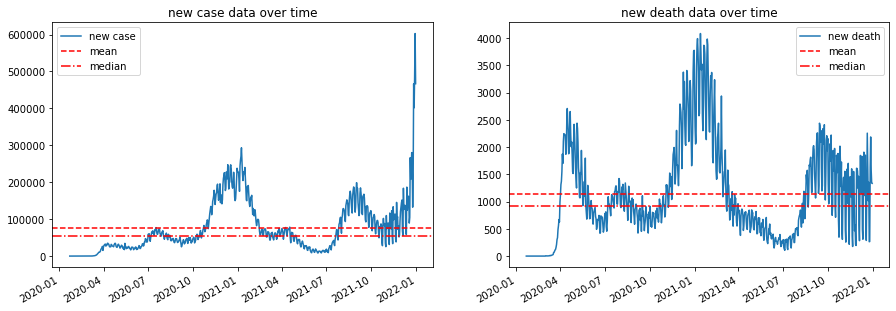

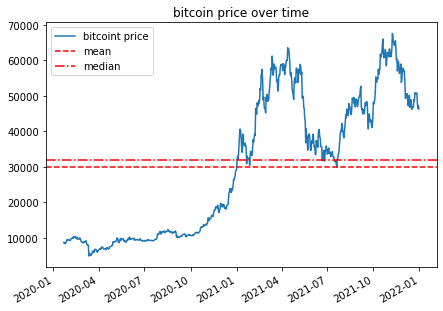

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.plot(btc_case_data['Date'], btc_case_data['new_case'].to_numpy())
plt.axhline(y=btc_case_data['new_case'].mean(), color='r', linestyle='--')
plt.axhline(y=btc_case_data['new_case'].median(), color='r', linestyle='-.')
plt.legend(['new case','mean','median'])
plt.title('new case data over time')
plt.subplot(122)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.plot(btc_case_data['Date'], btc_case_data['new_death'].to_numpy())
plt.axhline(y=btc_case_data['new_death'].mean(), color='r', linestyle='--')
plt.axhline(y=btc_case_data['new_death'].median(), color='r', linestyle='-.')
plt.legend(['new death','mean','median'])
plt.title('new death data over time')

plt.figure(figsize=(7, 5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.plot(btc_case_data['Date'], btc_case_data['Price'].to_numpy())
plt.axhline(y=btc_case_data['Price'].mean(), color='r', linestyle='--')
plt.axhline(y=btc_case_data['Price'].median(), color='r', linestyle='-.')
plt.legend(['bitcoint price','mean','median'])
plt.title('bitcoin price over time')

### b. Use Chi-square test to check the independence between cases dataset and bitcoin price

Use the mean to divide the case data into low number of new cases high number of new cases. Perform the same method on bitcoin price column and the price data is divided into high price and low price.
1. H0:  new case and bitcoin price are independent; H1:  new case and bitcoin price are NOT independent

In [ ]:
hc_hp = ((btc_case_data['new_case'] > btc_case_data['new_case'].mean()) & (btc_case_data['Price'] > btc_case_data['Price'].mean())).value_counts()[1]
hc_lp = ((btc_case_data['new_case'] > btc_case_data['new_case'].mean()) & (btc_case_data['Price'] <= btc_case_data['Price'].mean())).value_counts()[1]
lc_hp = ((btc_case_data['new_case'] <= btc_case_data['new_case'].mean()) & (btc_case_data['Price'] > btc_case_data['Price'].mean())).value_counts()[1]
lc_lp = ((btc_case_data['new_case'] <= btc_case_data['new_case'].mean()) & (btc_case_data['Price'] <= btc_case_data['Price'].mean())).value_counts()[1]

In [ ]:
O_cp = np.array([[hc_hp, hc_lp],[lc_hp, lc_lp]])
E_cp = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        E_cp[i,j] = (O_cp[i,:].sum() / O_cp.sum()) * O_cp[:,j].sum()

Q_obs = 0      
for i in range(2):
    for j in range(2):
        Q_obs += (E_cp[i,j] - O_cp[i,j])**2 / E_cp[i,j]
print('degree of freedom is 1')
print('Q_obs value is:' + str(Q_obs))
print('After table lookup the Chi square value for df=1, alpha=0.05 is 3.841')

degree of freedom is 1
Q_obs value is:65.95674900752013
After table lookup the Chi square value for df=1, alpha=0.05 is 3.841


Since the Q_obs is smaller than Chi square value, we accept H0. i.e. the bitcoin price and new cases are independent

### c. Use t-test to check if new cases has impact on bitcoin price

By observing the graph above, Nov 2020 to Feb 2021 are the time where the number of new cases reach the peak. By comparing the dividing the data samples before and during this period we can test if number of new covid cases has impact on bitcoin price.
Here we use the Z test.
1. H0:  new case has no impact bitcoin price; H1:  new case has impact on bitcoin price

In [ ]:
def Z_test(D1,D2):
    D1_bar = D1.mean()
    D2_bar = D2.mean()
    n1 = D1.shape[0]
    n2 = D2.shape[0]
    sigma1_sqr = (((D1**2).sum()) / n1) - D1_bar**2
    sigma2_sqr = (((D2**2).sum()) / n2) - D2_bar**2
    Z = (D1_bar - D2_bar) / np.sqrt(sigma1_sqr/n1 + sigma2_sqr/n2)
    p = 2 * ( 1 - stats.norm.cdf(np.abs(Z)) )
    return Z,p


mask_covid = (btc_case_data['Date'] >= '2020-11-1') & (btc_case_data['Date'] <= '2021-3-1')
mask_ncovid = (btc_case_data['Date'] <= '2021-10-1')
covid_price = btc_case_data.loc[mask_covid]['Price'].to_numpy()
ncovid_price = btc_case_data.loc[mask_ncovid]['Price'].to_numpy()

Z_tmp, p_tmp = Z_test(covid_price,ncovid_price)
print("Z is:{}, p-value is:{}".format(Z_tmp,p_tmp))

Z is:2.8726706203835857, p-value is:0.0040701822873008275


We compare the bitcoin price when the covid cases are surging and before that using Z-test. As a result, Z statistic is greater than 1.96 and p value <0.05. Thus, The null hypothesis is Rejected. Thus, Covid does has impact on bicoin price based on this inference.

### d. Use Pearson correlation test to check if vaccination rate has an impact on bitcoin price

In [ ]:
original_vaccinations_data
original_vaccinations_data.sort_values(by='Date', inplace=True)
original_vaccinations_data.reset_index(drop=True, inplace=True)
original_vaccinations_data
us_vaccine_data = original_vaccinations_data.groupby(by=['Date'], dropna=False).sum().reset_index()
us_vaccine_data

,Date,Administered
0,2020-12-13,0
1,2020-12-14,1018
2,2020-12-15,25276
3,2020-12-16,103268
4,2020-12-17,254684
...,...,...
515,2022-05-12,1176377214
516,2022-05-13,1177191264
517,2022-05-14,1178122356
518,2022-05-15,1178718573


In [ ]:
us_vaccine_data['Administered_new'] = us_vaccine_data['Administered'].diff()
us_vaccine_data['Administered_new'].iloc[0] = 0

/Users/zhezhou/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
us_vaccine_data

,Date,Administered,Administered_new
0,2020-12-13,0,0.0
1,2020-12-14,1018,1018.0
2,2020-12-15,25276,24258.0
3,2020-12-16,103268,77992.0
4,2020-12-17,254684,151416.0
...,...,...,...
515,2022-05-12,1176377214,960610.0
516,2022-05-13,1177191264,814050.0
517,2022-05-14,1178122356,931092.0
518,2022-05-15,1178718573,596217.0


In [ ]:
btc_vaccine_data = us_vaccine_data.merge(btc_data, how='inner', on='Date')
btc_vaccine_data

,Date,Administered,Administered_new,Price,Open,High,Low,Vol.,Change %
0,2020-12-13,0,0.0,19176.8,18808.1,19403.6,18716.8,82.45K,1.96
1,2020-12-14,1018,1018.0,19273.8,19176.4,19346.5,19007.0,67.11K,0.51
2,2020-12-15,25276,24258.0,19434.9,19273.9,19556.3,19076.2,98.39K,0.84
3,2020-12-16,103268,77992.0,21352.2,19434.7,21525.3,19299.7,199.81K,9.87
4,2020-12-17,254684,151416.0,22825.4,21352.3,23738.0,21243.1,310.74K,6.90
...,...,...,...,...,...,...,...,...,...
379,2021-12-27,1020164224,1385836.0,50678.2,50783.6,52016.3,50459.0,43.90K,-0.20
380,2021-12-28,1023231234,3067010.0,47545.2,50703.4,50703.8,47345.7,74.39K,-6.18
381,2021-12-29,1025850287,2619053.0,46461.7,47548.4,48121.7,46127.8,63.92K,-2.28
382,2021-12-30,1028559940,2709653.0,47123.3,46470.7,47901.4,46003.0,60.96K,1.42


Text(0.5, 1.0, 'bitcoin price over time')

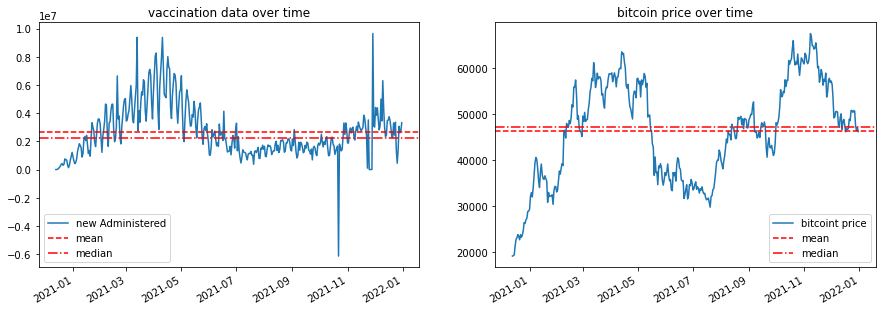

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.plot(btc_vaccine_data['Date'], btc_vaccine_data['Administered_new'].to_numpy())
plt.axhline(y=btc_vaccine_data['Administered_new'].mean(), color='r', linestyle='--')
plt.axhline(y=btc_vaccine_data['Administered_new'].median(), color='r', linestyle='-.')
plt.legend(['new Administered','mean','median'])
plt.title('vaccination data over time')
plt.subplot(122)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.plot(btc_vaccine_data['Date'], btc_vaccine_data['Price'].to_numpy())
plt.axhline(y=btc_vaccine_data['Price'].mean(), color='r', linestyle='--')
plt.axhline(y=btc_vaccine_data['Price'].median(), color='r', linestyle='-.')
plt.legend(['bitcoint price','mean','median'])
plt.title('bitcoin price over time')

### e. Check if new administered and bitcoin price are linear correlated
Common beliefs suggest that COVID19 vaccination rate may have impact on the bitcoin price but not the otherway around.
So, to investigate the impact of vaccination data towards bitcoin dataset, the pearson correlation test can check for possible linear
relationship between to Dataset.
1. H0:  new administartion and bitcoin price are NOT linearly correlated; H1:  new administartion and bitcoin price are linearly correlated
2. Compute S(x,y)

In [ ]:
def compute_corr(X,Y):
    n = X.shape[0]
    X_bar = X.mean()
    Y_bar = Y.mean()
    covar = 0
    sigma2X = 0
    sigma2Y = 0
    for i in range(n):
        covar += (X[i] - X_bar) * (Y[i] - Y_bar)
        sigma2X += (X[i] - X_bar)**2
        sigma2Y += (Y[i] - Y_bar)**2
    corr = covar / ((np.sqrt(sigma2X)) * (np.sqrt(sigma2Y)))
    return corr

In [ ]:
corr_vac_pr = compute_corr(btc_vaccine_data['Administered_new'],btc_vaccine_data['Price'])
print(('The correlation between new administered and bitcoin Price is {}').format(corr_vac_pr))

The correlation between new administered and bitcoin Price is 0.47584162257973517


Sicne the absolute value of correlation is smaller than 0.5. We accept the original assumption.
Therefore, vaccination rate and bitcoin price are NOT linearly correlated. Thus we infer the vaccination wouldn't affect the bitcoin price.

### Comment on inferences
Above, we used Chi-square test, Z-test, and Pearson correlation test. Among these three, the Z test is the best tool for investigating the impact of COVID. 
1. The Pearson correlation test only concerns the linear dependence between two datasets. And possible non-linear dependency might not be captured.
2. The Chi-square test divides the bitcoin price into two sets, so for the new cases number/ new deaths number. However, this clear cutoff highly depends on the cutoff value. And it might not suits every data distribution(multilevel etc). 
3. Z-test only divides new cases number/ new deaths number into two sets, and it can capture non-linear dependencies.
To sum up, Z-test is the best inference tool overall. And we conclude that the COVID has an impact on the bitcoin price.

## Part 2